In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os
path=os.listdir('Training')
classes={'notumor':0,
         'glioma':1,
         'meningioma':2,
         'pituitary':3}
          
         

In [4]:
import cv2
x=[]
y=[]
for cls in classes:
    input_path='Training/'+cls
    for j in os.listdir(input_path):
        img=cv2.imread(input_path+'/'+j,0)
        if img is None:
            continue
        if img.size:    
            img=cv2.resize(img,(200,200))
            x.append(img)
            y.append(classes[cls])

In [5]:
np.unique(y)

array([0, 1, 2, 3])

In [6]:
X=np.array(x)
Y=np.array(y)

In [7]:
# to display the label and count of image in that lable

pd.Series(Y).value_counts()

0    1595
3    1457
2    1339
1    1321
Name: count, dtype: int64

In [9]:
X.shape

(5712, 200, 200)

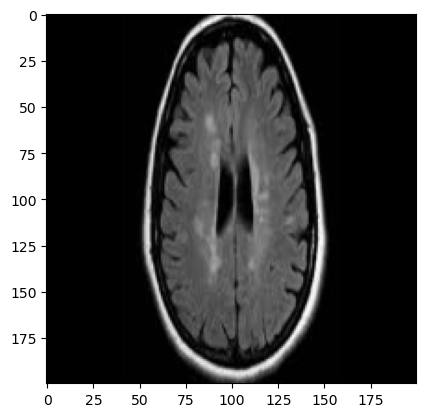

In [10]:
#visualize the data


plt.imshow(X[500],cmap='gray')

In [62]:
Y[500]

0

In [63]:
X[500]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [64]:
#PREPARING DATA

In [11]:
X_new=X.reshape(len(X),-1)
X_new.shape

(5712, 40000)

In [12]:
#split data
#48 is not can give differnt number if we not give random sate is null so we giving random size

Xtrain,Xtest,ytrain,ytest=train_test_split(X_new,y,random_state=48,test_size=0.20)

In [13]:
Xtrain.shape,Xtest.shape

((4569, 40000), (1143, 40000))

In [14]:
#feature scaing,normalize the data

print(Xtrain.max(),Xtrain.min())
print(Xtest.max(),Xtest.min())
Xtrain=Xtrain/255
Xtest=Xtest/255
print(Xtrain.max(),Xtrain.min())
print(Xtest.max(),Xtest.min())



255 0
255 0
1.0 0.0
1.0 0.0


In [69]:
Xtrain.shape,Xtest.shape

((4569, 40000), (1143, 40000))

In [15]:
#convert into categorical data (on-hot encoder)
import keras
num_classes=4
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

2024-02-19 10:37:32.792974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 10:38:00.361528: I itex/core/wrapper/itex_cpu_wrapper.cc:42] Intel Extension for Tensorflow* AVX512 CPU backend is loaded.
2024-02-19 10:38:21.583733: I itex/core/wrapper/itex_gpu_wrapper.cc:35] Intel Extension for Tensorflow* GPU backend is loaded.
2024-02-19 10:38:21.631446: W itex/core/ops/op_init.cc:58] Op: _QuantizedMaxPool3D is already registered in Tensorflow
2024-02-19 10:38:21.981182: E itex/core/devices/gpu/itex_gpu_runtime.cc:173] Can not found any devices. To check runtime environment on your host, please run itex/tools/env_check.sh.
If you need help, create an issue at https://github.com/intel/intel-extension-for-tensorflow/i

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [17]:
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=[40000]))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(4,activation="softmax"))
                


In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2560064   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 2585412 (9.86 MB)
Trainable params: 2585412 (9.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#backpropogation,optimizer
model.compile(loss="categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics="accuracy")

In [20]:
#model fitting
history=model.fit(Xtrain,ytrain,
                  epochs=20,
                  batch_size=12,
                  verbose=1,
                  validation_data=(Xtest,ytest))

Epoch 1/20


2024-02-19 10:39:15.846156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type CPU is enabled.


381/381 [==============================] - 5s 9ms/step - loss: 1.1705 - accuracy: 0.4822 - val_loss: 0.9906 - val_accuracy: 0.6789
Epoch 2/20
381/381 [==============================] - 3s 8ms/step - loss: 0.9139 - accuracy: 0.6673 - val_loss: 0.7917 - val_accuracy: 0.7428
Epoch 3/20
381/381 [==============================] - 3s 8ms/step - loss: 0.7770 - accuracy: 0.7163 - val_loss: 0.7153 - val_accuracy: 0.7375
Epoch 4/20
381/381 [==============================] - 3s 8ms/step - loss: 0.6988 - accuracy: 0.7455 - val_loss: 0.7188 - val_accuracy: 0.6990
Epoch 5/20
381/381 [==============================] - 3s 8ms/step - loss: 0.6344 - accuracy: 0.7667 - val_loss: 0.6795 - val_accuracy: 0.7367
Epoch 6/20
381/381 [==============================] - 3s 8ms/step - loss: 0.5904 - accuracy: 0.7864 - val_loss: 0.6069 - val_accuracy: 0.7725
Epoch 7/20
381/381 [==============================] - 3s 8ms/step - loss: 0.5533 - accuracy: 0.8070 - val_loss: 0.6051 - val_accuracy: 0.7752
Epoch 8/20
381/38

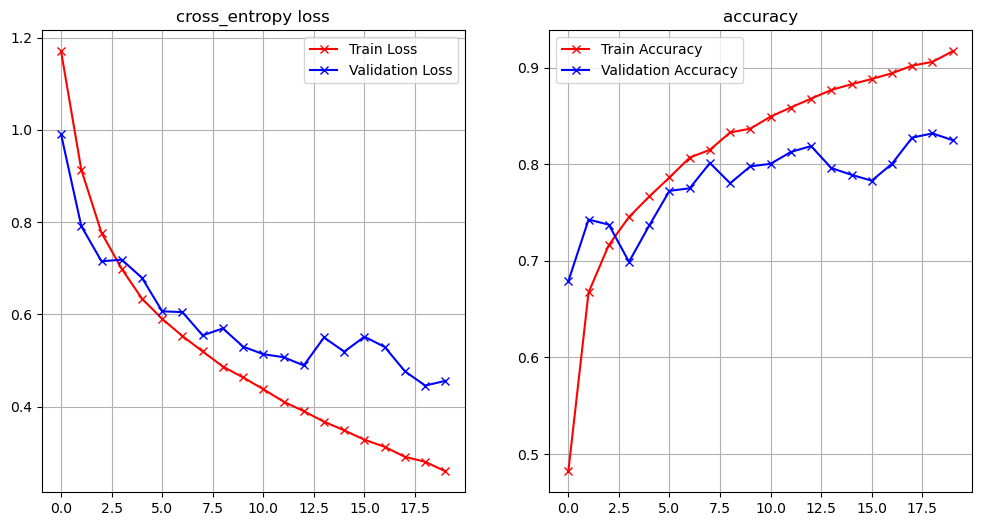

In [21]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)   


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

In [22]:
np.argmax(model.predict(Xtest[[5]]))

1/1 [==============================] - 0s 195ms/step


1

array([0., 1., 0., 0.], dtype=float32)

In [23]:
model.predict(Xtest[[5]])

1/1 [==============================] - 0s 19ms/step


array([[5.9054387e-03, 8.2418472e-01, 1.6923052e-01, 6.7926140e-04]],
      dtype=float32)

In [24]:
prediction = model.predict(Xtest[[5]])
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 19ms/step


In [25]:
for tumor_type, class_label in classes.items():
    if class_label == predicted_class:
        predicted_tumor_type = tumor_type
        break
print("Predicted Tumor Type:", predicted_tumor_type)

Predicted Tumor Type: glioma


In [39]:
model.save('example_model.keras')